<a href="https://colab.research.google.com/github/mehrdad117/Brain-Age-prediction-/blob/main/final_step_model_evaluation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Default title text
!pip install tpot
from sklearn.metrics import accuracy_score

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
 
 
import pandas as pd #this is how we usually import pandas
import numpy as np #this is how we usually import numpy
 
import matplotlib #only needed to determine Matplotlib version number
#import tables # pytables is needed to read and write hdf5 files
#import openpyxl # is used to read and write MS Excel files
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
 
import xgboost
 
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 92kB 6.3MB/s 
     |████████████████████████████████| 157.5MB 89kB/s 
     |████████████████████████████████| 163kB 51.8MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp36-none-any.whl size=11954 sha256=b835af3999eb9ed8894a6be88ce2a8b6b88fb2b82bacbbf9c2fd85614d8d3daf
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


load data 

In [ ]:

#train_pre2 = pd.read_csv('/content/drive/MyDrive/Finalfinal.csv')


train_pre2 = pd.read_csv('/content/drive/MyDrive/Finalfinalplusval.csv')


train_pre2 = train_pre2.drop('SubjectID' , axis=1)


#size_mapping = {
     #   #   'M': 0,
       #    'F': 1,
        #         }

#train_pre2['Sex'] = train_pre2['Sex'].map(size_mapping)

features_all = train_pre2.drop('Age', axis=1) #.values
target = train_pre2['Age']
target = target.values #.reshape(-1,1)

features_all.shape

In [ ]:
newdata = pd.read_csv('/content/drive/MyDrive/new.csv')


newdata = newdata.drop('SubjectID' , axis=1)
newdata.shape


# **split**


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features_all, target,
                                                    train_size=0.87, test_size=0.13, random_state=42)

In [ ]:
X_train.shape ,X_test.shape

((64, 407), (16, 407))

# **feature selection **

In [ ]:
train_pre2 = pd.read_csv('/content/drive/MyDrive/Finalfinal.csv')

train_pre2 = train_pre2.drop('SubjectID' , axis=1)


#size_mapping = {
     #   #   'M': 0,
       #    'F': 1,
        #         }

#train_pre2['Sex'] = train_pre2['Sex'].map(size_mapping)

features_all = train_pre2.drop('Age', axis=1)
target = train_pre2['Age']
target = target.values #.reshape(-1,1)
#target = train_pre.iloc[:,-1]
#features_all = train_pre.iloc[:,1:428]

#train_pre2.drop('SubjectID', axis=1).values

X_train, X_test, y_train, y_test = train_test_split(features_all, target,   
                                                   train_size=0.9, test_size=0.1, random_state=42)

In [ ]:

features_all = pd.DataFrame(features_all)

# creating set to hold the correlated features
corr_features = set()

# create the correlation matrix (default to pearson)
corr_matrix = train_pre2.corr(method='spearman')

# optional: display a heatmap of the correlation matrix
#plt.figure(figsize=(11,11))
#sns.heatmap(corr_matrix)

for i in range(len(corr_matrix .columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.81 :
            colname = corr_matrix.columns[i]
            corr_features.add(colname)
            
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

drop these features from test dataset 

In [ ]:
newdata.drop(labels=corr_features, axis=1, inplace=True)
newdata.shape

# **model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from sklearn.preprocessing import FunctionTransformer
from copy import copy


exported_pipeline = make_pipeline(
    make_union(
        make_union(
            FunctionTransformer(copy),
            make_union(
                make_union(
                    FunctionTransformer(copy),
                    FunctionTransformer(copy)
                ),
                FunctionTransformer(copy)
            )
        ),
        make_union(
            FunctionTransformer(copy),
            FunctionTransformer(copy)
        )
    ),
    ElasticNetCV(l1_ratio=0.15000000000000002, tol=0.1)
)

set_param_recursive(model.steps, 'random_state', 42)

# **over fitting / underfitting**

calculate MAE/MSE for train and test dataset to calculate overfitting / underfitting

In [ ]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mae = mean_absolute_error(y_train, predictions)
    return mae
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions1 = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions1)
    return mae
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error




train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, model)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('test/train: {}'.format(round(test_error/train_error, 1)))
  

# **kfold score**

In [ ]:
import pandas as pd
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import LeaveOneOut

# prepare the cross-validation procedure
cv1 = KFold(n_splits=10, random_state=42, shuffle=True)

# LeaveOneOut()

# evaluate model
scores = cross_val_score(model, X_train, y_train, cv=LeaveOneOut() ,scoring='neg_mean_absolute_error', n_jobs=-1)


cv_predicts_k_folds = cross_val_predict(model, features_all, target, cv=10)

print("Predicted class for each record: {}".format(cv_predicts_k_folds))
print("MAE score in each iteration: {}".format(scores))
print("K-Fold Score: {}".format(np.mean(scores)))
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

# **learning curve**

# #1

Mean training scores

 6     6.254195
20    5.235420
34    5.380024
48    5.590690
62    5.494894
dtype: float64

 --------------------

Mean validation scores

 6     11.758310
20     8.208043
34     7.521526
48     7.249810
62     6.780767
dtype: float64


(0.0, 40.0)

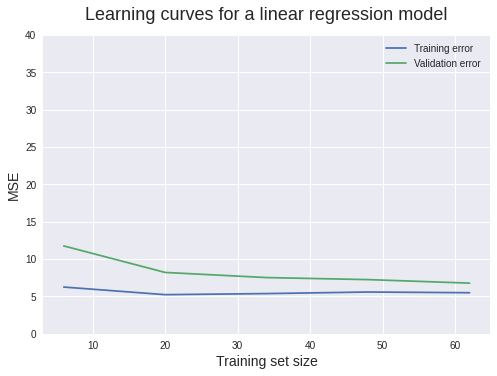

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', n_jobs=-1, shuffle=True, random_state=42)

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1 )
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))


### Plotting the two learning curves ###

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curve ', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)


# #2

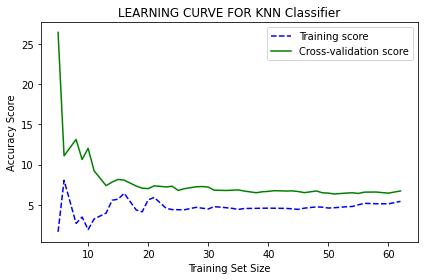

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Obtain scores from learning curve function 
# cv is the number of folds while performing Cross Validation 
sizes, training_scores, testing_scores = learning_curve(model, X_train, y_train, cv=10, scoring='neg_mean_absolute_error', train_sizes=np.linspace(0.01, 1.0, 50)) 

# Mean and Standard Deviation of training scores 
mean_training = -np.mean(training_scores, axis=1) 
Standard_Deviation_training = -np.std(training_scores, axis=1) 

# Mean and Standard Deviation of testing scores 
mean_testing = -np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = -np.std(testing_scores, axis=1) 

# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b", label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 

# Standard Deviation of testing scores 
#plt.plot(sizes, Standard_Deviation_training, '--', color="b", label="Training score") 
#plt.plot(sizes, Standard_Deviation_testing, color="g", label="Cross-validation score")


# Drawing plot 
plt.title("LEARNING CURVE ") 
plt.xlabel("Training Set Size"), plt.ylabel("MAE"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()


# #3

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, scoring='neg_mean_absolute_error', n_jobs=-1, shuffle=True, random_state=42)



train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1 )


# Create means and standard deviations of training set scores
train_mean = -np.mean(train_scores, axis=1)
train_std = -np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = -np.mean(valid_scores, axis=1)
test_std = -np.std(valid_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("MAE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# **Validation curve**

cv 

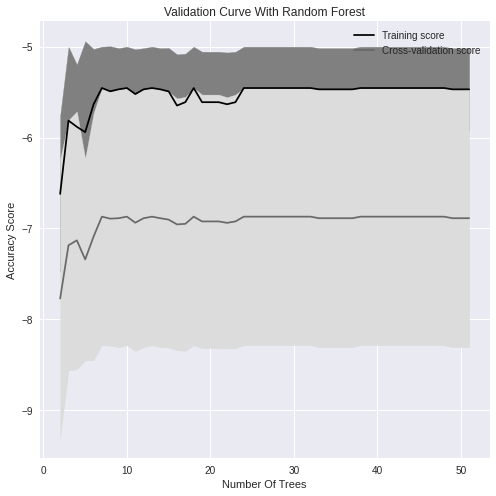

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0, 60, 1)

train_scores, test_scores = validation_curve(model,
                                  X_train, y_train, param_name="cv", param_range=param_range,
                                  scoring="neg_mean_absolute_error", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve ")
plt.xlabel("CV ")
plt.ylabel("MAE")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

tol

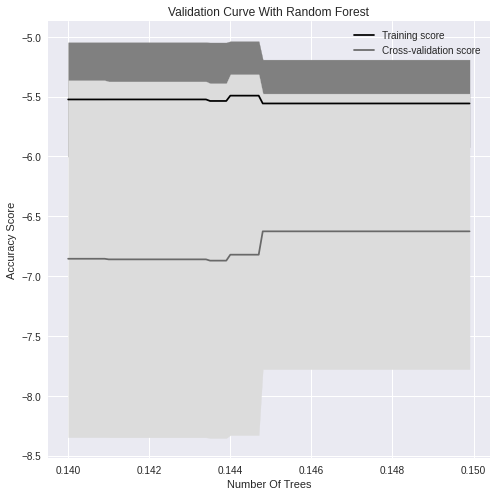

In [ ]:
from sklearn.model_selection import validation_curve

param_range = np.arange(0.14, 0.15, 0.0001)

train_scores, test_scores = validation_curve(model,
                                  X_train, y_train, param_name="tol", param_range=param_range,
                                  scoring="neg_mean_absolute_error", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")
 
plt.title("Validation Curve")
plt.xlabel("tol")
plt.ylabel("MAE")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
model.fit(features_all, target)

ElasticNetCV(alphas=None, copy_X=True, cv=48, eps=0.001, fit_intercept=True,
             l1_ratio=0.7000000000000001, max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.1445, verbose=0)

In [ ]:
results = model.predict(newdata)
results.shape

(20,)

In [ ]:
results

array([33.44277969, 40.99106218, 52.97777851, 45.75070169, 35.42633148,
       30.10594445, 33.34426416, 25.16841858, 47.03522673, 47.61675104,
       59.43153658, 35.45050073, 37.60441586, 58.95710981, 53.25606465,
       49.31665203, 50.0886556 , 52.74729296, 29.17480128, 44.43011048])

In [ ]:
import numpy 
import pandas as pd
numpy.savetxt('data.csv',results ,delimiter=',')

GridSearchCV

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Use grid search to tune the parameters:

parametersGrid = {"max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)}

eNet = ElasticNet()
grid = GridSearchCV(eNet, parametersGrid, scoring='neg_mean_absolute_error', cv=10)
grid.fit(X_train, y_train)
Y_pred = grid.predict(X_test)

In [ ]:

prd= model.predict(X_test)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mean_absolute_error(y_test, prd) , mean_squared_error(y_test, prd)

(6.317674755923158, 77.14607607066596)